In [1]:
#Importing Libraries
import random as rd
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

In [2]:
df = pd.read_csv('modern-renewable-energy-consumption-asia(1).csv')

In [3]:
df = df[df['Entity'] == 'China']
df = df.drop(['Unnamed: 0'], axis=1)
#df.drop(df[df['Year'] <= 1998].index, inplace = True)
df

,Entity,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
68,China,1985,92.387557,0.000000,0.000000,0.000000
69,China,1986,94.548644,0.000000,0.000000,0.000000
70,China,1987,100.024280,0.000000,0.000000,0.000000
71,China,1988,109.168019,0.000000,0.000000,0.000000
72,China,1989,118.408984,0.000000,0.000000,0.000000
73,China,1990,126.743973,0.002000,0.002020,0.064000
74,China,1991,124.688952,0.002000,0.009091,0.064000
75,China,1992,130.686077,0.003000,0.131313,0.113000
76,China,1993,151.846165,0.004000,0.212121,0.117000
77,China,1994,167.428969,0.005000,0.383838,0.460000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 68 to 101
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             34 non-null     object 
 1   Year                               34 non-null     int64  
 2   Hydropower (terawatt-hours)        34 non-null     float64
 3   Solar (terawatt-hours)             34 non-null     float64
 4   Wind (terawatt-hours)              34 non-null     float64
 5   Other renewables (terawatt-hours)  34 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.9+ KB


In [5]:
df.isnull().sum()

Entity                               0
Year                                 0
Hydropower (terawatt-hours)          0
Solar (terawatt-hours)               0
Wind (terawatt-hours)                0
Other renewables (terawatt-hours)    0
dtype: int64

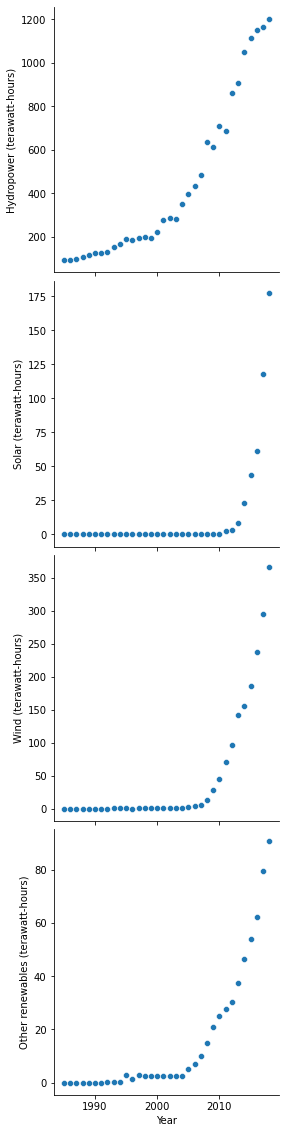

In [6]:
# Using pairplot we'll visualize the data
sns.pairplot(df, x_vars='Year', 
y_vars=['Hydropower (terawatt-hours)','Solar (terawatt-hours)', 'Wind (terawatt-hours)', 'Other renewables (terawatt-hours)'],
height=4, aspect=1, kind='scatter')
plt.show()

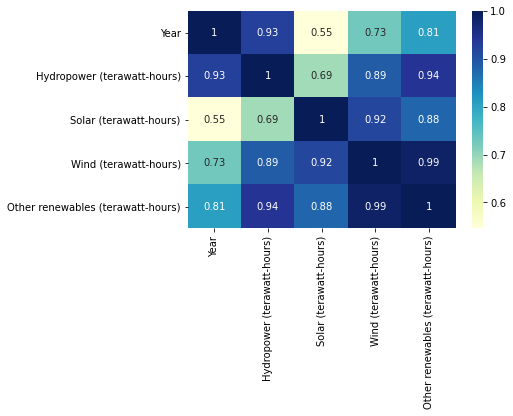

In [7]:
# Visualizing the data using heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Doing Simple Linear Regression for each Energy Source                                    1) Hydropower

In [8]:
#Setting the value for X and Y
x_vars = df['Year'].values.reshape(-1,1)
y_vars = df['Hydropower (terawatt-hours)'].values.reshape(-1,1)

In [9]:
#Splitting the dataset: 70% train and 30% test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_vars, y_vars, test_size = 0.3,
random_state = 100)

In [10]:
#Fitting the Simple Linear Regression model
#To build a linear regression model, we need to create an instance of 
#LinearRegression() class and use x_train, y_train to train the model using the 
#fit() method of that class. Now, the variable lr is an instance of the
#LinearRegression() class.
from sklearn.linear_model import LinearRegression
reg = LinearRegression()  
reg.fit(x_train, y_train)

LinearRegression()

In [11]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

31.993302811060172
-63609.34695837198
The linear model is: Y = -6.3609e+04 + 31.993X


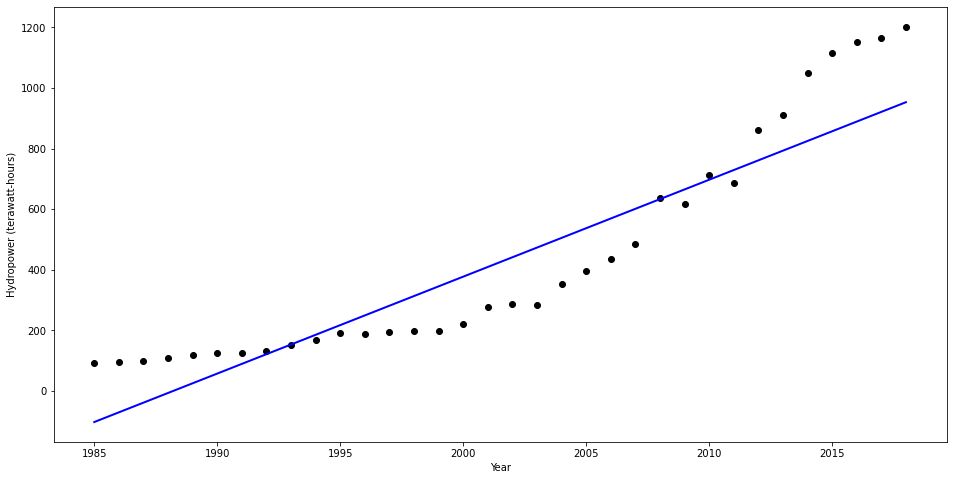

In [12]:
predictions = reg.predict(x_vars)

plt.figure(figsize=(16, 8))
plt.scatter(
    df['Year'],
    df['Hydropower (terawatt-hours)'],
    c='black'
)
plt.plot(
    df['Year'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Year")
plt.ylabel("Hydropower (terawatt-hours)")
plt.show()

In [13]:
X = df['Year']
y = df['Hydropower (terawatt-hours)']

#Add a constant. Essentially, we are adding a new column (equal in length to x), which consits of only 1s
X2 = sm.add_constant(X)
#Fit the model according to OLS method with a dependent variable y
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:     Hydropower (terawatt-hours)   R-squared:                       0.857
Model:                                     OLS   Adj. R-squared:                  0.853
Method:                          Least Squares   F-statistic:                     191.8
Date:                         Sat, 16 Apr 2022   Prob (F-statistic):           4.58e-15
Time:                                 09:14:05   Log-Likelihood:                -215.67
No. Observations:                           34   AIC:                             435.3
Df Residuals:                               32   BIC:                             438.4
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [14]:
#From the summary table, we can say that the intercept (const) coefficient is -6.829e+04 and the 
#independent variable coefficient is 34.3397
#(signifies if Year increases by 1 units, Hydropower increases by 34.3397 units)

#If the p-value of the independent variable/s is greater than 0.050, we say that the variable is not 
#significant and we may drop the variable. In our case, the p-value of Year is 0.000 and as it is lesser 
#than 0.050, we can say that this variable is significant. [Also, if we think logically, Year is a significant 
#variable to predict Hydropower]

#And finally, the R-squared, R² is nothing but the goodness of the fit of the model. 
#In other words, how well our model fitted the observation. R² ranges between 0
#and 1. There is no clear universal range for the best R² but, it depends on a case-
#to-case basis.

#Adjusted R² on the other hand, is a modified version of R-squared that has been adjusted for the number of predictors 
#(inputs) in the model. The adjusted R-squared increases when the new independent term improves the model more than 
#would be expected by chance. It decreases when a predictor improves the model by less than expected.

In [15]:
#Prediction of test set
y_pred_lr = reg.predict(x_test)
#Predicted values
print("Prediction for test set:\n {}".format(y_pred_lr))
print("Actual value for training set:\n {}".format(y_test))

Prediction for test set:
 [[697.19169186]
 [953.13811435]
 [857.15820591]
 [ 57.32563564]
 [-70.64757561]
 [313.27205813]
 [473.23857218]
 [889.15150873]
 [505.23187499]
 [ 89.31893845]
 [185.29884688]]
Actual value for training set:
 [[ 711.38314  ]
 [1202.43     ]
 [1114.51541  ]
 [ 126.7439726]
 [  94.5486436]
 [ 198.89     ]
 [ 283.68     ]
 [1153.2695   ]
 [ 353.544    ]
 [ 124.6889516]
 [ 167.428969 ]]


In [25]:
[int(item[0]) for item in y_pred_lr]
[int(item[0]) for item in y_test]
test_vs_real = {'Actual Value': y_test, 'Predicted value': y_pred_lr}
#comparison = pd.DataFrame([test_vs_real])
#comparison

In [26]:
#Model Evaluation
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_lr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_lr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
print('R squared: {:.2f}'.format(reg.score(x_vars,y_vars)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 85.08
Mean Absolute Error: 138.94922560511625
Mean Square Error: 27640.260991214556
Root Mean Square Error: 166.25360444578203


# 2) Solar 

In [393]:
#Setting the value for X and Y
x_vars = df['Year'].values.reshape(-1,1)
y_vars = df['Solar (terawatt-hours)'].values.reshape(-1,1)

In [394]:
#Splitting the dataset: 70% train and 30% test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_vars, y_vars, test_size = 0.3,
random_state = 100)

In [395]:
#Fitting the Simple Linear Regression model
#To build a linear regression model, we need to create an instance of 
#LinearRegression() class and use x_train, y_train to train the model using the 
#fit() method of that class. Now, the variable lr is an instance of the
#LinearRegression() class.
reg = LinearRegression()  
reg.fit(x_train, y_train)

LinearRegression()

In [396]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

1.1866162189955478
-2367.7578931498297
The linear model is: Y = -2367.8 + 1.1866X


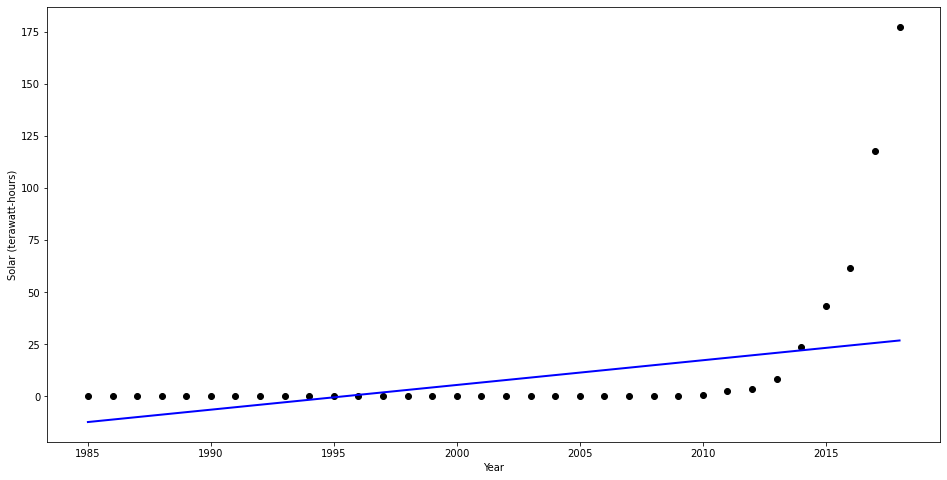

In [397]:
predictions = reg.predict(x_vars)

plt.figure(figsize=(16, 8))
plt.scatter(
    df['Year'],
    df['Solar (terawatt-hours)'],
    c='black'
)
plt.plot(
    df['Year'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Year")
plt.ylabel("Solar (terawatt-hours)")
plt.show()

In [398]:
X = df['Year']
y = df['Solar (terawatt-hours)']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                              OLS Regression Results                              
Dep. Variable:     Solar (terawatt-hours)   R-squared:                       0.298
Model:                                OLS   Adj. R-squared:                  0.276
Method:                     Least Squares   F-statistic:                     13.59
Date:                    Thu, 14 Apr 2022   Prob (F-statistic):           0.000838
Time:                            17:42:56   Log-Likelihood:                -164.81
No. Observations:                      34   AIC:                             333.6
Df Residuals:                          32   BIC:                             336.7
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -

In [399]:
#Prediction of test set
y_pred_lr = reg.predict(x_test)
#Predicted values
print("Prediction for test set:\n {}".format(y_pred_lr))
print("Actual value for training set:\n {}".format(y_test))

Prediction for test set:
 [[ 17.34070703]
 [ 26.83363678]
 [ 23.27378813]
 [ -6.39161735]
 [-11.13808222]
 [  3.1013124 ]
 [  9.0343935 ]
 [ 24.46040435]
 [ 10.22100972]
 [ -5.20500113]
 [ -1.64515247]]
Actual value for training set:
 [[7.0100e-01]
 [1.7750e+02]
 [4.3560e+01]
 [2.0000e-03]
 [0.0000e+00]
 [1.4000e-02]
 [6.4000e-02]
 [6.1686e+01]
 [7.6000e-02]
 [2.0000e-03]
 [5.0000e-03]]


# 3) Wind 

In [400]:
#Setting the value for X and Y
x_vars = df['Year'].values.reshape(-1,1)
y_vars = df['Wind (terawatt-hours)'].values.reshape(-1,1)

In [401]:
#Splitting the dataset: 70% train and 30% test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_vars, y_vars, test_size = 0.3,
random_state = 100)

In [402]:
#Fitting the Simple Linear Regression model
#To build a linear regression model, we need to create an instance of 
#LinearRegression() class and use x_train, y_train to train the model using the 
#fit() method of that class. Now, the variable lr is an instance of the
#LinearRegression() class.
reg = LinearRegression()  
reg.fit(x_train, y_train)

LinearRegression()

In [403]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

5.302326621738656
-10575.243139271935
The linear model is: Y = -1.0575e+04 + 5.3023X


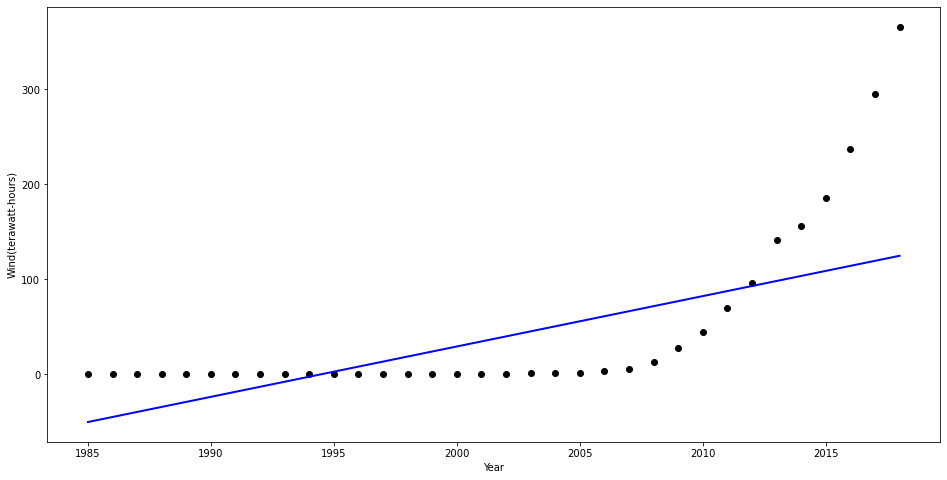

In [404]:
predictions = reg.predict(x_vars)

plt.figure(figsize=(16, 8))
plt.scatter(
    df['Year'],
    df['Wind (terawatt-hours)'],
    c='black'
)
plt.plot(
    df['Year'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Year")
plt.ylabel("Wind(terawatt-hours)")
plt.show()

In [405]:
X = df['Year']
y = df['Wind (terawatt-hours)']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                              OLS Regression Results                             
Dep. Variable:     Wind (terawatt-hours)   R-squared:                       0.529
Model:                               OLS   Adj. R-squared:                  0.514
Method:                    Least Squares   F-statistic:                     35.95
Date:                   Thu, 14 Apr 2022   Prob (F-statistic):           1.10e-06
Time:                           17:43:07   Log-Likelihood:                -189.49
No. Observations:                     34   AIC:                             383.0
Df Residuals:                         32   BIC:                             386.0
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.373e+04 

# Other renewables

In [406]:
#Setting the value for X and Y
x_vars = df['Year'].values.reshape(-1,1)
y_vars = df['Other renewables (terawatt-hours)'].values.reshape(-1,1)

In [407]:
#Splitting the dataset: 70% train and 30% test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_vars, y_vars, test_size = 0.3,
random_state = 100)

In [408]:
#Fitting the Simple Linear Regression model
#To build a linear regression model, we need to create an instance of 
#LinearRegression() class and use x_train, y_train to train the model using the 
#fit() method of that class. Now, the variable lr is an instance of the
#LinearRegression() class.
reg = LinearRegression()  
reg.fit(x_train, y_train)

LinearRegression()

In [410]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

1.64328486875454
-3275.5057817798825
The linear model is: Y = -3275.5 + 1.6433X


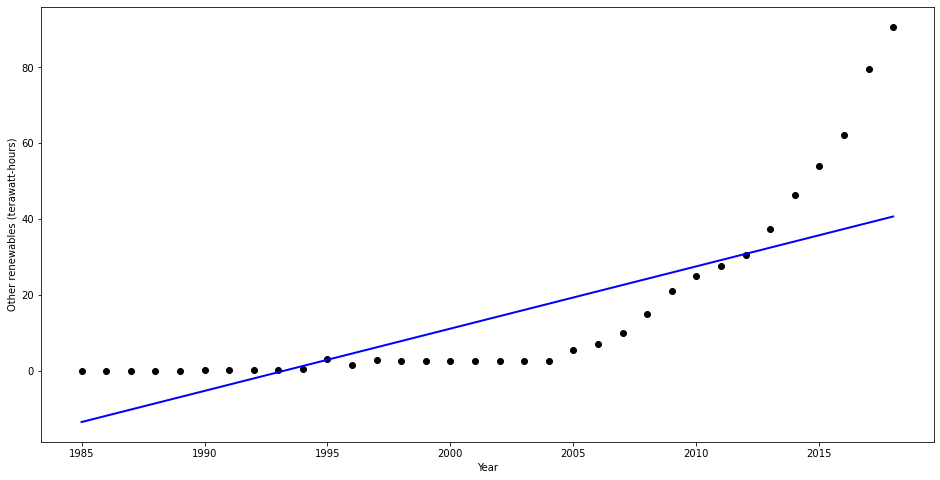

In [411]:
predictions = reg.predict(x_vars)

plt.figure(figsize=(16, 8))
plt.scatter(
    df['Year'],
    df['Other renewables (terawatt-hours)'],
    c='black'
)
plt.plot(
    df['Year'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Year")
plt.ylabel("Other renewables (terawatt-hours)")
plt.show()

In [412]:
X = df['Year']
y = df['Other renewables (terawatt-hours)']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Other renewables (terawatt-hours)   R-squared:                       0.651
Model:                                           OLS   Adj. R-squared:                  0.641
Method:                                Least Squares   F-statistic:                     59.80
Date:                               Thu, 14 Apr 2022   Prob (F-statistic):           8.11e-09
Time:                                       17:43:19   Log-Likelihood:                -138.42
No. Observations:                                 34   AIC:                             280.8
Df Residuals:                                     32   BIC:                             283.9
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                 coef    std err          t      P>|t|      

In [413]:
#Prediction of test set
y_pred_lr = reg.predict(x_test)
#Predicted values
print("Prediction for test set:\n {}".format(y_pred_lr))
print("Actual value for training set:\n {}".format(y_test))

Prediction for test set:
 [[ 27.49680442]
 [ 40.64308337]
 [ 35.71322876]
 [ -5.36889296]
 [-11.94203243]
 [  7.77738599]
 [ 15.99381034]
 [ 37.35651363]
 [ 17.6370952 ]
 [ -3.72560809]
 [  1.20424652]]
Actual value for training set:
 [[2.49002300e+01]
 [9.07234617e+01]
 [5.40702900e+01]
 [6.40000000e-02]
 [0.00000000e+00]
 [2.48000000e+00]
 [2.53600000e+00]
 [6.21347670e+01]
 [2.52800000e+00]
 [6.40000000e-02]
 [4.60000000e-01]]
